# Mohammad Amin Nazerzadeh: mohammad.nazerzadeh@studio.unibo.it
# Davide Baldelli: davide.baldelli4@studio.unibo.it
# Mohammad Reza Ghasemi Madani: mohammadreza.ghasemi@studio.unibo.it 

# Explore HotPotQA

in this notebook we are going to figure out how the dataset is composed.

## Install dependencies

In [ ]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 6.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


## Downloading HotPotQA

In [ ]:
from datasets import load_dataset

hpqa = load_dataset("hotpot_qa", "distractor")

Generating train split:   0%|          | 0/90447 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/7405 [00:00<?, ? examples/s]

Dataset hotpot_qa downloaded and prepared to /root/.cache/huggingface/datasets/hotpot_qa/distractor/1.0.0/133b9501f892e5193babbad937bee3b4899deb4691ef4d791e6ac0111c875bb5. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

Let's have a look to the structure of the dataset

In [ ]:
hpqa

DatasetDict({
    train: Dataset({
        features: ['id', 'question', 'answer', 'type', 'level', 'supporting_facts', 'context'],
        num_rows: 90447
    })
    validation: Dataset({
        features: ['id', 'question', 'answer', 'type', 'level', 'supporting_facts', 'context'],
        num_rows: 7405
    })
})

As it comes without a test set, we are going to compute a train - validation split on the provided train set, and use the validation set as test.

## Explore HotPotQA

Each row of the dataset contains: 
* ID 
* Question
* Answer
* Contexts as a list of lists of sentences
* Titles for each contexts
* Supporting facts: titles and corresponding sentences' IDs useful for answering the question 
* The level of difficulty: easy, medium or hard
* The type of question: comparison or bridge

In [ ]:
import numpy as np 
from pprint import pprint

idx = np.random.randint(len(hpqa["train"]))
pprint(hpqa["train"][idx])

{'answer': 'London',
 'context': {'sentences': [['Northwich Victoria Football Club are an English '
                            'football club based in Northwich, Cheshire.',
                            ' They are currently competing in the Northern '
                            'Premier League Premier Division.',
                            ' The club was founded in 1874, playing challenge '
                            'matches organised on an ad hoc basis until the '
                            '1877 season, when they entered the Welsh Cup for '
                            'the first time.',
                            ' The club entered two other competitions (The '
                            'Cheshire Senior Cup in 1879 and the FA Cup in '
                            '1882) before finally playing league football in '
                            'The Combination in 1890, for which they were '
                            'founding members.',
                            ' They became

Let's see a sample of comparison and bridge QA pair:

In [ ]:
idx = 22610
question = hpqa["train"][idx]["question"]
answer = hpqa["train"][idx]["answer"]
print(f"TYPE: bridge\nQUESTION: {question}\nANSWER: {answer}")

idx = 83244
question = hpqa["train"][idx]["question"]
answer = hpqa["train"][idx]["answer"]
print(f"\n\nTYPE: comparison\nQUESTION: {question}\nANSWER: {answer}")


TYPE: bridge
QUESTION: Who is known for having worked as chief designer at Givenchy from 1996 to 2001 and for founding his own Alexander McQueen label, who's work was worn by Icelandic musician Björk? 
ANSWER: Lee Alexander McQueen


TYPE: comparison
QUESTION: Which writer is Indian-born, Rohinton Mistry or Bruce Jay Friedman?
ANSWER: Rohinton Mistry


Let's print out some statistics about the dataset

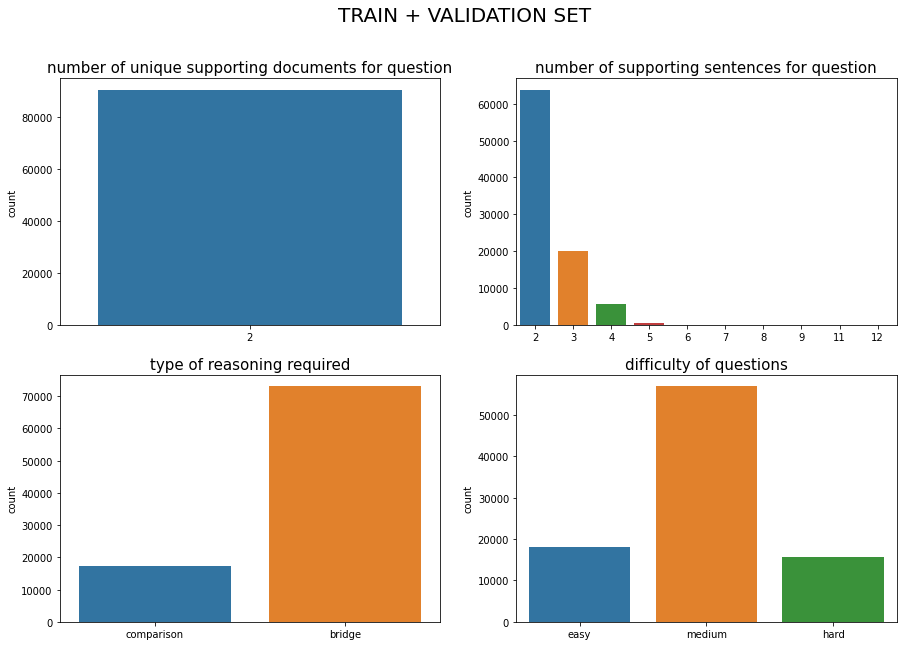

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datasets import Dataset


fig, axs = plt.subplots(2,2,figsize = (15,10))

fig.suptitle("TRAIN + VALIDATION SET", size = 20)

sns.countplot(x = [len(np.unique(x['title'])) for x in hpqa['train']['supporting_facts']], ax = axs[0, 0])
axs[0,0].set_title("number of unique supporting documents for question", size = 15)

sns.countplot(x = [len(x['sent_id']) for x in hpqa['train']['supporting_facts']], ax = axs[0, 1])
axs[0,1].set_title("number of supporting sentences for question", size = 15)

sns.countplot(x = hpqa['train']['type'], ax = axs[1, 0])
axs[1,0].set_title("type of reasoning required", size = 15)

sns.countplot(x = hpqa['train']['level'], order = ["easy", "medium", "hard"], ax = axs[1, 1])
axs[1,1].set_title("difficulty of questions", size = 15)
plt.show()

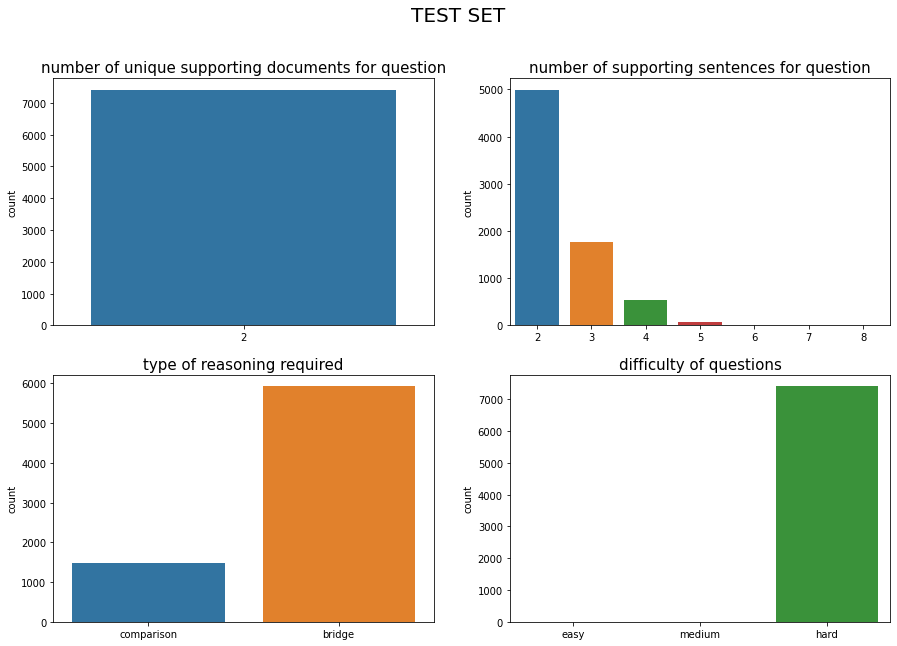

In [ ]:
fig, axs = plt.subplots(2,2,figsize = (15,10))

fig.suptitle("TEST SET", size = 20)

sns.countplot(x = [len(np.unique(x['title'])) for x in hpqa['validation']['supporting_facts']], ax = axs[0, 0])
axs[0,0].set_title("number of unique supporting documents for question", size = 15)

sns.countplot(x = [len(x['sent_id']) for x in hpqa['validation']['supporting_facts']], ax = axs[0, 1])
axs[0,1].set_title("number of supporting sentences for question", size = 15)

sns.countplot(x = hpqa['validation']['type'], ax = axs[1, 0])
axs[1,0].set_title("type of reasoning required", size = 15)

sns.countplot(x = hpqa['validation']['level'], order = ["easy", "medium", "hard"], ax = axs[1, 1])
axs[1,1].set_title("difficulty of questions", size = 15)
plt.show()

All the questions are "hard" in the test set. Rather than this, all the other statistics seem to be coherent between test and train.

#### Bad indexed samples

We have found that there are some bad indexed samples. We are going to collect the indexes in the lists `err_train_ids` and `err_val_ids`.


In [ ]:
import pandas as pd 
from tqdm import tqdm 

###################
###### TRAIN ######
###################

err_train_ids = []
i = 0
for row in tqdm(hpqa["train"]):
    
    titles = row["context"]["title"]
    sent_ids = row["supporting_facts"]["sent_id"] 
    gold_titles = row["supporting_facts"]["title"]
    gold_ids = [titles.index(gold_title) for gold_title in gold_titles]

    try: 
      gold_sentences = [row["context"]["sentences"][gold_id][sent_id] for gold_id, sent_id in zip(gold_ids, sent_ids)]
    except IndexError: 
      err_train_ids.append(i)
      i+=1
      continue
    i+=1


###############################
###### VAL PREPROCESSING ######
###############################

err_val_ids = []
i=0
for row in tqdm(hpqa["validation"]):
    
    gold_titles = row["supporting_facts"]["title"]
    sent_ids = row["supporting_facts"]["sent_id"] 
    titles = row["context"]["title"]
    gold_ids = [titles.index(gold_title) for gold_title in gold_titles]

    try: 
      gold_sentences = [row["context"]["sentences"][gold_id][sent_id] for gold_id, sent_id in zip(gold_ids, sent_ids)]
    except IndexError: 
      err_val_ids.append(i)
      i+=1
      continue

    i+=1


100%|██████████| 7405/7405 [00:01<00:00, 4945.51it/s]


For example, in the following sample, one of the supporiting facts should be the fourth sentence (index 3) of the paragraph "Jodie Witthaker", that only has 3 sentences. 

We have discarded those samples. 


In [ ]:
hpqa["train"][err_train_ids[-1]]

{'id': '5a8a317455429930ff3c0cef',
 'question': "This British comedy-drama film starred Peter O'Toole and an English actress praised for her role as a grieving mother in what film?",
 'answer': 'Broadchurch',
 'type': 'bridge',
 'level': 'medium',
 'supporting_facts': {'title': ['Venus (film)',
   'Jodie Whittaker',
   'Jodie Whittaker',
   'Jodie Whittaker'],
  'sent_id': [0, 0, 2, 3]},
 'context': {'title': ['Venus (film)',
   'B.S. I Love You',
   'East Is East (1999 film)',
   'Jessica Brown Findlay',
   'The Long and the Short and the Tall (play)',
   'Bring Back the Dead',
   'Jodie Whittaker',
   'Faust (1960 film)',
   'Roberta Tovey',
   'Beverly Hills Brats'],
  'sentences': [["Venus is a 2006 British comedy-drama film starring Peter O'Toole, Leslie Phillips, Vanessa Redgrave and Jodie Whittaker.",
    ' It is directed by Roger Michell and written by Hanif Kureishi.'],
   ['B.S. I Love You is an American comedy-drama film from 1971.',
    ' It was directed and written by Stev

In [ ]:
print(f"There are {len(err_train_ids)} bad indexed samples in the train + val dataset.")
print(f"There are  {len(err_val_ids)} bad indexed samples in the test dataset.")

There are 22 bad indexed samples in the train + val dataset.
There are  1 bad indexed samples in the test dataset.
